## MCAR(Missing complete AT Random)

***

**Delete the row if** 


1.data set in huge length
***
 




## # In the statical way(Dont use for clustring and Trees based algorithym)


***
**check the distribution -histplot
if :**


>1. Mean --->Normal distribution
***

*****
**go for checking outliers-boxplot**

>2.Median --->effected by outliers
*****
**if the squead the go for the mode** 
>3.Mode--->df.mode()
*****
**if yes:-**
>--->use the fillna
*****    
*****
**2nd Method**

>Random sample imputaition

`def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample`


# MNAR -:
***
>**1.use statical way for capturing technique--:**

`df['Age_NAN']=np.where(df['Age'].isnull(),1,0)`
***

***
**2.use the end distribution**

`extreme=df.Age.mean()+3*df.Age.std()`

***


# if catgorical data:-

***
### use friquency techinique--MCAR
`def impute_nan(df,variable):
    most_frequent_category=df[variable].mode()[0]
    df[variable].fillna(most_frequent_category,inplace=True)`
***
***
### use friquecy capture  techinique-- MNAR

***



.

.

.

***


>**important Graph**
    `fig = plt.figure()
    ax = fig.add_subplot(111)
    df['Age'].plot(kind='kde', ax=ax)
    df.Age_median.plot(kind='kde', ax=ax, color='red')
    df.Age_random.plot(kind='kde', ax=ax, color='green')
    lines, labels = ax.get_legend_handles_labels()
    ax.legend(lines, labels, loc='best')
    `

# Defination 

###**Is the data missing at random?**

**Types of missingness**

1. Missing Completely at Random (MCAR)
> *Missingness has no relationship between any values, observed or missing*
2. Missing at Random (MAR)
> *There is a systematic relationship between missingness and other observed data, but not the missing data*
3. Missing Not at Random (MNAR)
> *There is a relationship between missingness and its values, missing or non-missing*

###**When and how to delete missing data?**

**Types of deletions**
1. Pairwise deletion
>Pandas skips `NaN` whic is equivalent to pairwise deletion. Pairwise deletions minimize the amount of data loss and are hence preferred. However, it is also true that at several instances they might negatively affect our analysis. 
2. Listwise deletion
> In listwise deletion the incomplete row is deleted, also called complete case analysis. The major disadvantage of listwise deletions is amount of data lost. 
>Example: `df.dropna(subset=['column'], how='any',inplace=True)`


Note: *Both of these deletions are used only when the values are missing completely at random that is MCAR*

In [1]:
import pandas as pd
import missingno as  msno
pd.set_option('display.max_columns',None)

In [2]:
df=pd.read_csv('ml_case_training_data.csv')

In [3]:
df.head()

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,2012-11-07,2015-11-09,NaN,NaN,NaN,NaN,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,NaN,2015-06-23,NaN,NaN,NaN,NaN,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,2009-08-21,2015-08-31,NaN,NaN,NaN,NaN,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,2010-04-16,2015-04-17,NaN,NaN,NaN,NaN,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,2010-03-30,2015-03-31,NaN,NaN,NaN,NaN,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200


In [4]:
df.isnull().sum()

id                              0
activity_new                 9545
campaign_disc_ele           16096
channel_sales                4218
cons_12m                        0
cons_gas_12m                    0
cons_last_month                 0
date_activ                      0
date_end                        2
date_first_activ            12588
date_modif_prod               157
date_renewal                   40
forecast_base_bill_ele      12588
forecast_base_bill_year     12588
forecast_bill_12m           12588
forecast_cons               12588
forecast_cons_12m               0
forecast_cons_year              0
forecast_discount_energy      126
forecast_meter_rent_12m         0
forecast_price_energy_p1      126
forecast_price_energy_p2      126
forecast_price_pow_p1         126
has_gas                         0
imp_cons                        0
margin_gross_pow_ele           13
margin_net_pow_ele             13
nb_prod_act                     0
net_margin                     15
num_years_anti

***
## Check the null values with visulation in bar chart
***


<AxesSubplot:>

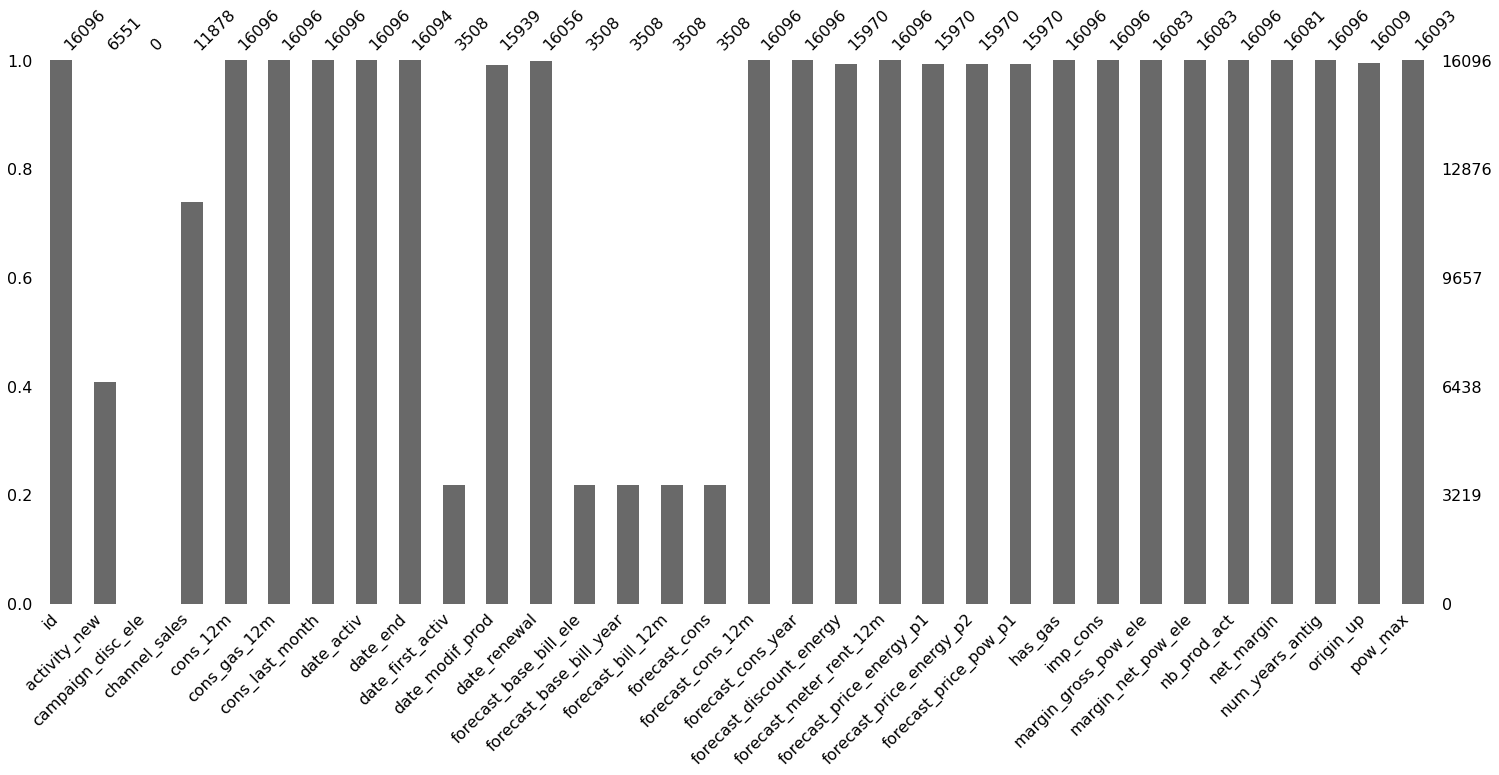

In [5]:
msno.bar(df)

**which column have greater then 75% null valuse thats name is**
>`['campaign_disc_ele','date_first_activ','forecast_base_bill_ele','forecast_base_bill_year',
       'forecast_bill_12m', 'forecast_cons']`


**channel sales have aprox 25% null values**
> here we can apply the predication techinique to fill the null values

***
.

.

****

## warnning-
>**befor to dealing with it make isnure that you can convert into continuous dataset 
here i take the `channel_sales` as a example ,we can not complete with this feature 
because it is a categerocial we wil have to apply the cetegorical techinique not continous techinque
here it is a countinous techinque**


In [6]:
y=df['channel_sales']
x=df.drop('channel_sales',axis=1)


In [7]:
n1=df[['id','channel_sales']]

In [8]:
index=n1[n1[['id','channel_sales']].isnull().any(axis=1)].index.to_list()

In [9]:
y_train=y.drop(index,axis=0)
x_train=x.drop(index,axis=0)
x_test=x.iloc[index,:]

**objective-:**
>making the y_test

>+join with the y_train

>merge y_train with the x on the basis of id and we get the df 

`from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
y_test=pd.DataFrame(y_pred,index=index)`

**y1=concat with the y_train and y_test (axis=0)**

**df=concat with y1 and drop channel sales**

# Distribution of null values

<AxesSubplot:>

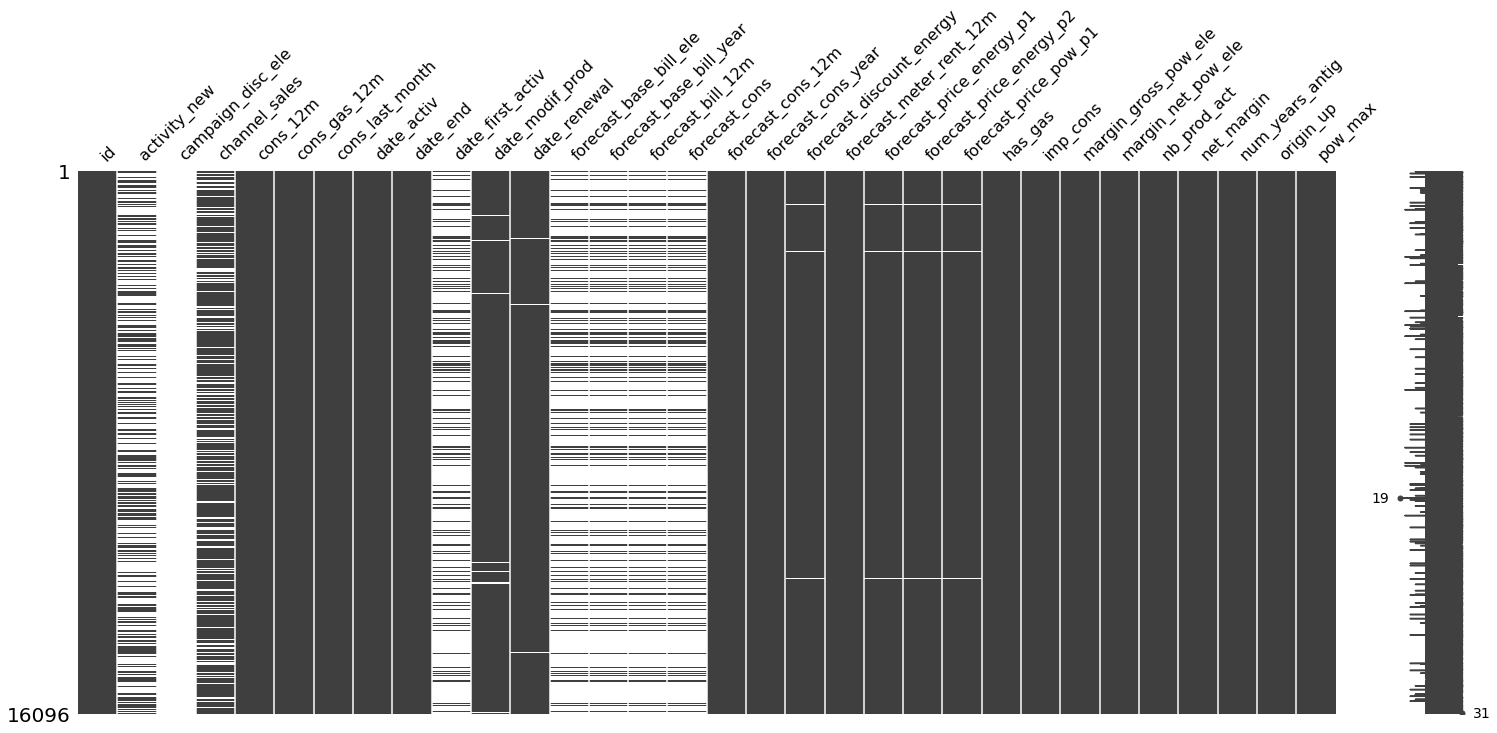

In [10]:
msno.matrix(df)

we can delete `campaign_disc_ele` because it is not uniform and also have not more the 70% not values for implemented
predication techinque which i mention above

In [11]:
MCAR=[]
MNAR=[]
# make the columns first 

<AxesSubplot:>

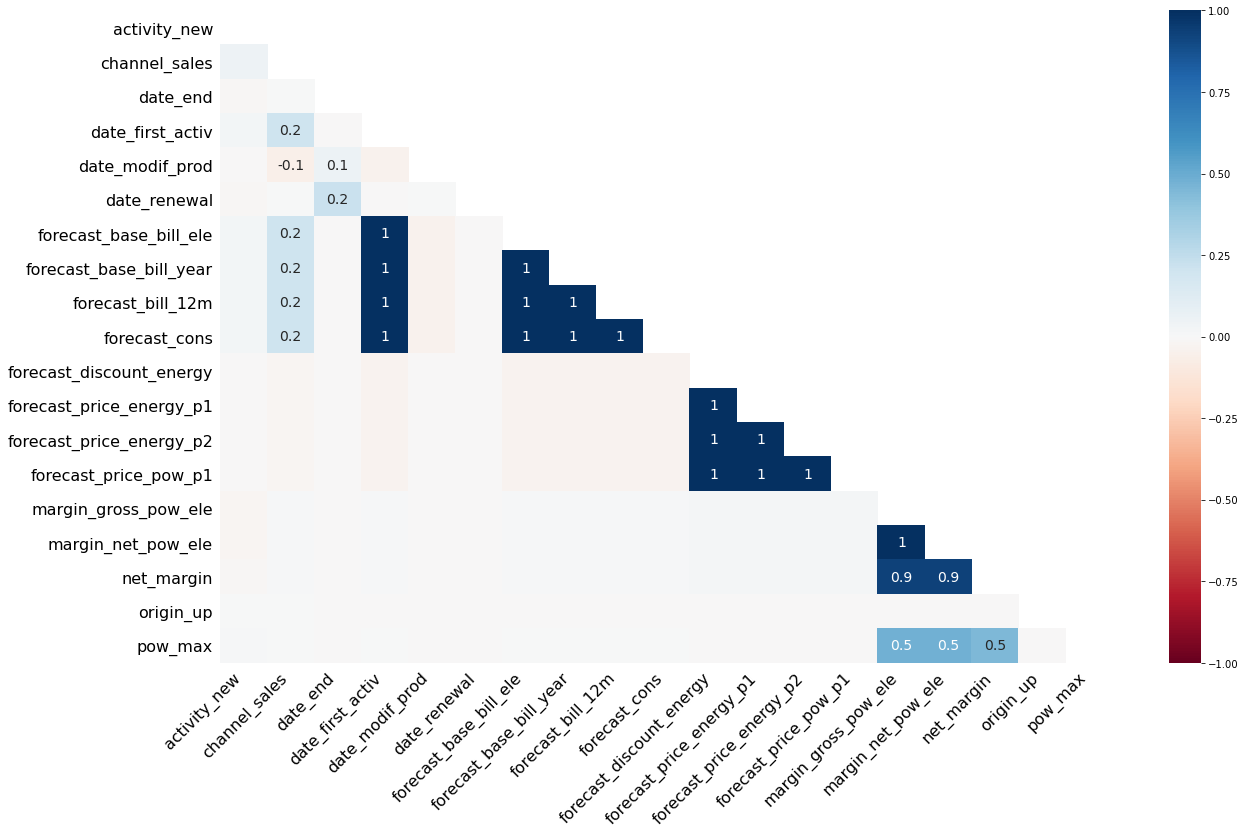

In [12]:
# step-2
msno.heatmap(df)

In [13]:
#go the blank of the row 
#check into right and down if 
#value<=0.5 -->MCAR
#value>0.5  -->MNAR

In [14]:
mcar=['activity_new','channel_sales','date_end','date_modif_prod','date_renewal','origin_up','pow_max']

In [15]:
k1=df.drop(mcar,axis=1)

<AxesSubplot:>

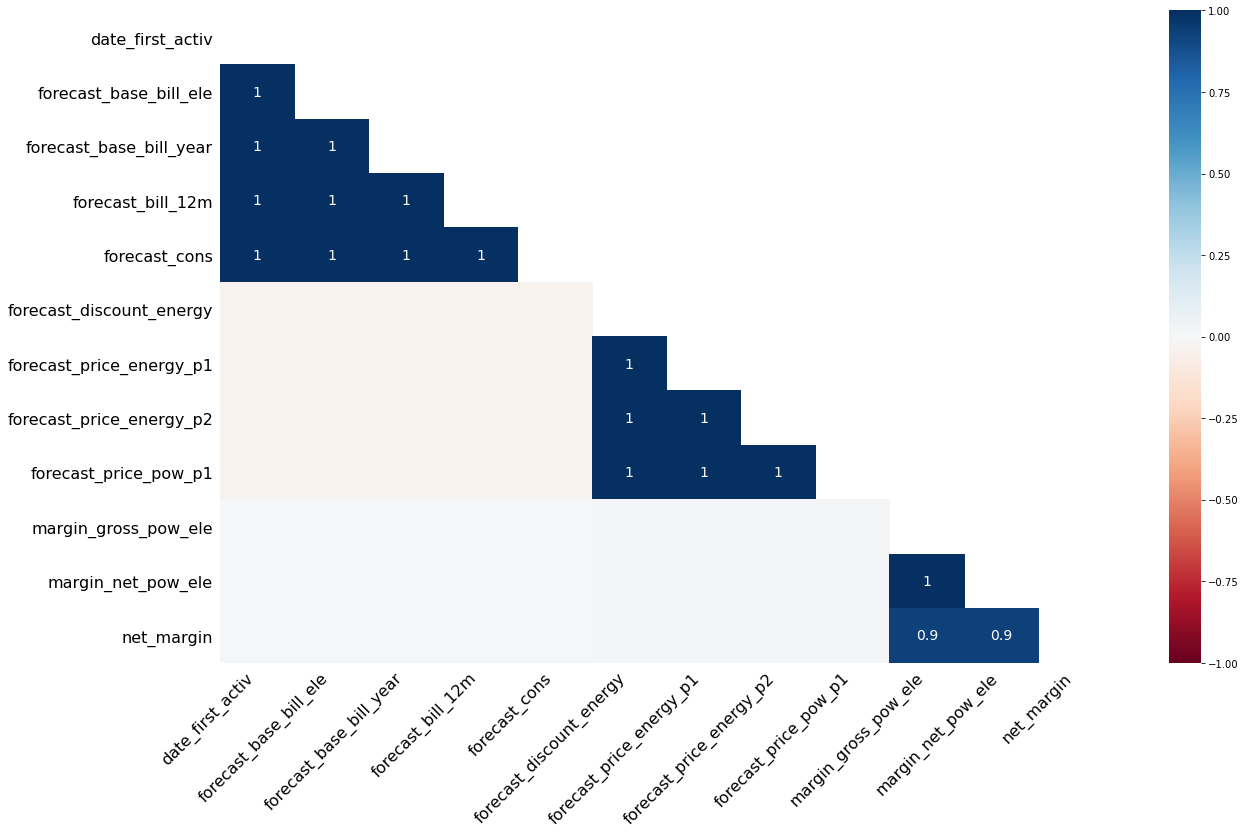

In [16]:
msno.heatmap(k1)